In [6]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles                                                                  
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [7]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [8]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


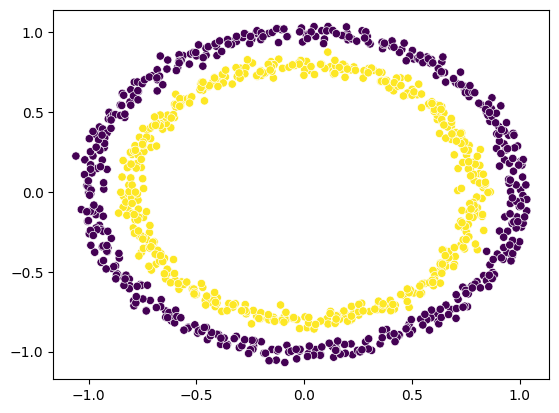

In [9]:
# Visualize with a plot
import seaborn as sns
sns.scatterplot(x=X[:, 0], 
            y=X[:, 1], 
            c=y
            );

In [10]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [12]:
# X_train.shape
y_test[:5,]

tensor([1., 0., 1., 0., 1.])

In [13]:
 import torch
 from torch import nn 
 
 class model_one(nn.Module):
     def __init__(self):
         super().__init__()
         self.layer_1=nn.Linear(2,5)
         self.layer_2=nn.Linear(5,1)
         
     def forward(self,x):
         return self.layer_2(self.layer_1(x))
     
        
        
         

In [14]:
model=model_one()

In [15]:
test=model(X_train)

In [16]:
test.squeeze()

tensor([0.4423, 0.4737, 0.6608, 0.6648, 0.4388, 0.6768, 0.4820, 0.3504, 0.5046,
        0.4134, 0.5304, 0.6344, 0.4250, 0.5717, 0.6365, 0.6692, 0.3683, 0.6674,
        0.5328, 0.5697, 0.4561, 0.5280, 0.3509, 0.6308, 0.5874, 0.6011, 0.3725,
        0.5070, 0.4634, 0.4517, 0.5636, 0.3109, 0.3366, 0.4851, 0.3409, 0.4278,
        0.3764, 0.6140, 0.4566, 0.4133, 0.4842, 0.6273, 0.6697, 0.6082, 0.6574,
        0.5124, 0.6830, 0.3187, 0.6672, 0.6250, 0.6718, 0.3893, 0.6378, 0.5553,
        0.6207, 0.4155, 0.3256, 0.4733, 0.6250, 0.4989, 0.5103, 0.3512, 0.3405,
        0.6356, 0.4840, 0.3172, 0.4477, 0.6195, 0.3792, 0.4354, 0.5753, 0.3576,
        0.6364, 0.3296, 0.6526, 0.4093, 0.6569, 0.6516, 0.3180, 0.5922, 0.4207,
        0.6457, 0.6628, 0.4477, 0.4253, 0.6024, 0.4386, 0.4952, 0.6399, 0.5833,
        0.3608, 0.6070, 0.4999, 0.5722, 0.4156, 0.3642, 0.6818, 0.4351, 0.3626,
        0.4103, 0.6619, 0.6012, 0.3405, 0.3683, 0.6654, 0.3497, 0.3428, 0.4283,
        0.3264, 0.6844, 0.5979, 0.3434, 

In [17]:
def accuarcy(x,y):
    return (torch.eq(x,y).sum().item()/len(y))*100
    

In [18]:
epoches=100

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

train_loss=[]
epoches_num=[]


for i in range(epoches):
    model.train()
    y_pred=torch.round(torch.sigmoid(model(X_train).squeeze()))
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i %10==0:
        model.eval()
        
        with torch.inference_mode():
            y_pred=torch.round(torch.sigmoid(model(X_test).squeeze()))
            print(accuarcy(y_pred,y_test))
            
            # loss=loss_fn(y_pred,y_test)
            # print(loss)
        
    
    

50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0
50.0


## Not helping because we donot use the non linearlity 

In [40]:
 import torch
 from torch import nn 
 
 class model_one(nn.Module):
     def __init__(self):
         super().__init__()
         self.layer_1=nn.Linear(2,10)
         self.layer_2=nn.Linear(10,5)
         self.layer_3=nn.Linear(5,1)
         self.Relu=nn.ReLU()
         
     def forward(self,x):
         return self.layer_3(self.Relu(self.layer_2(self.Relu(self.layer_1(x)))))
     
        
        
         

In [41]:
model=model_one()

In [ ]:
epoches=100000

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model.parameters(), 
                            lr=0.1)

train_loss=[]
epoches_num=[]


for i in range(epoches):
    model.train()
    y_pred=model(X_train).squeeze()
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i %10==0:
        model.eval()
        
        with torch.inference_mode():
            y_pred=torch.round(torch.sigmoid(model(X_test).squeeze()))
            print(accuarcy(y_pred,y_test))
            
            
        
    
    

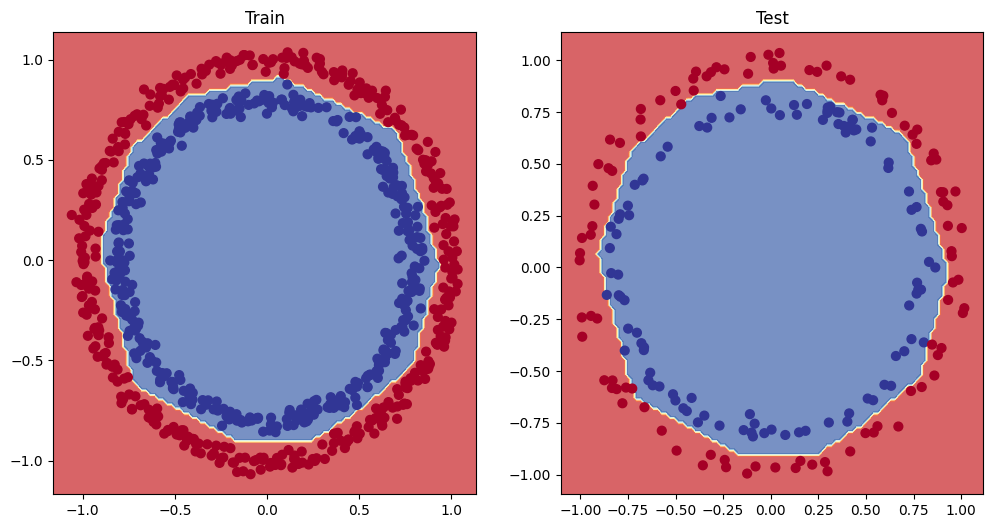

In [43]:
# Plot decision boundaries for training and test sets
import matplotlib.pyplot as plt
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test) # model_3 = has non-linearity